Needs to add a detailed explanation

In [67]:
import numpy as np
import pandas as pd

More information about the dataset can be found here.
http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)

In [68]:
#Import the database
data = pd.read_csv('BankFraud_dataset.csv')

In [69]:
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


Insight into the data

In [70]:
#There are 6 numerical and 8 categorical attributes. 
#The labels have been changed for the convenience of the statistical algorithms. 
#For example, attribute 4 originally had 3 labels p,g,gg and these have been changed to labels 1,2,3. 
#CustomerID For annonamity
#A1: 0,1 CATEGORICAL (formerly: a,b) 
#A2: continuous. 
#A3: continuous. 
#A4: 1,2,3 CATEGORICAL (formerly: p,g,gg) 
#A5: 1, 2,3,4,5, 6,7,8,9,10,11,12,13,14 CATEGORICAL (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x) 
#A6: 1, 2,3, 4,5,6,7,8,9 CATEGORICAL (formerly: ff,dd,j,bb,v,n,o,h,z) 
#A7: continuous. 
#A8: 1, 0 CATEGORICAL (formerly: t, f) 
#A9: 1, 0	CATEGORICAL (formerly: t, f) 
#A10: continuous. 
#A11: 1, 0	CATEGORICAL (formerly t, f) 
#A12: 1, 2, 3 CATEGORICAL (formerly: s, g, p) 
#A13: continuous. 
#A14: continuous. 
#A15: 1,2 class attribute (formerly: +,-)

In [71]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print("Shape of X ",X.shape)
print("Shape of y ",y.shape)

Shape of X  (690, 15)
Shape of y  (690,)


In [72]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X=sc.fit_transform(X)

In [73]:
#Train the SOM
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


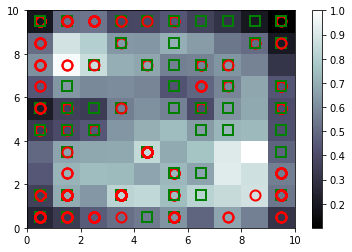

In [74]:
#Visualize the result
from pylab import bone, pcolor,colorbar, plot, show
%pylab inline
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors =  ['r','g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,w[1]+0.5,markers[y[i]],markeredgecolor=colors[y[i]],markerfacecolor='None',markersize = 10, markeredgewidth =2)

In [65]:
# Finding the frauds
mappings = som.win_map(X)
frauds = mappings[(1,5)]
frauds = sc.inverse_transform(frauds)

In [66]:
frauds[:,0]

array([ 15796813.,  15731166.,  15800773.,  15711249.,  15812766.,
        15776545.,  15792107.,  15700046.])